# Multi-modal RAG with LangChain

## SetUp

Install the dependencies you need to run the notebook.

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (28.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [2]:
!apt-get update
!apt-get install -y poppler-utils
%pip install pdf2image

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,518 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,859 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/rest

In [3]:
# %pip install "unstructured[all-docs]==0.11.5" unstructured-inference==0.7.18
# %pip install "unstructured[all-docs]==0.13.0"




In [4]:
%pip install -Uq "unstructured[all-docs]==0.15.7" pillow lxml
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 36.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 10.0 MB/s eta

In [5]:
import os
from dotenv import load_dotenv
# keys are stored in .env file
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = os.getenv("LANGCHAIN_TRACING_V2")


## Extract the data

Extract the elements of the PDF that we will be able to use in the retrieval process. These elements can be: Text, Images, Tables, etc.

### Partition PDF tables, text, and images

In [6]:
from unstructured.partition.pdf import partition_pdf

In [7]:
!pip show unstructured

Name: unstructured
Version: 0.15.7
Summary: A library that prepares raw documents for downstream ML tasks.
Home-page: https://github.com/Unstructured-IO/unstructured
Author: Unstructured Technologies
Author-email: devops@unstructuredai.io
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: backoff, beautifulsoup4, chardet, dataclasses-json, emoji, filetype, langdetect, lxml, nltk, numpy, psutil, python-iso639, python-magic, rapidfuzz, requests, tabulate, tqdm, typing-extensions, unstructured-client, wrapt
Required-by: 


In [8]:
!pip show unstructured-inference



Name: unstructured-inference
Version: 0.7.36
Summary: A library for performing inference using trained models.
Home-page: https://github.com/Unstructured-IO/unstructured-inference
Author: Unstructured Technologies
Author-email: devops@unstructuredai.io
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, layoutparser, matplotlib, onnx, onnxruntime, opencv-python, python-multipart, rapidfuzz, timm, torch, transformers
Required-by: 


In [9]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:

file_path = "/content/attention.pdf"
# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image"],
    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
# We get 2 types of elements from the partition_pdf function
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>"}

In [12]:
# Each CompositeElement containes a bunch of related elements.
# This makes it easy to use these elements together in a RAG pipeline.

chunks[3].metadata.orig_elements

In [13]:
# This is what an extracted image looks like.
# It contains the base64 representation only because we set the param extract_image_block_to_payload=True

elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'a25854b0-c1e3-45f5-a9d0-0cd2062559da',
 'text': 'Scaled Dot-Product Attention  Multi-Head Attention ',
 'metadata': {'detection_class_prob': 0.8599750995635986,
  'coordinates': {'points': ((410.50833333333327, 197.0675599999999),
    (410.50833333333327, 669.3112182617188),
    (1311.755126953125, 669.3112182617188),
    (1311.755126953125, 197.0675599999999)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-01-11T02:25:08',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHYA4UDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpT

### Separate extracted elements into tables, text, and images

In [14]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [15]:
tables

In [16]:
texts

In [17]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [18]:
images[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAOAAmADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5OTxVqWp6pdWPhjSI75LSQw3N/d3PkW6yjrGpCszsOh

#### Check what the images look like

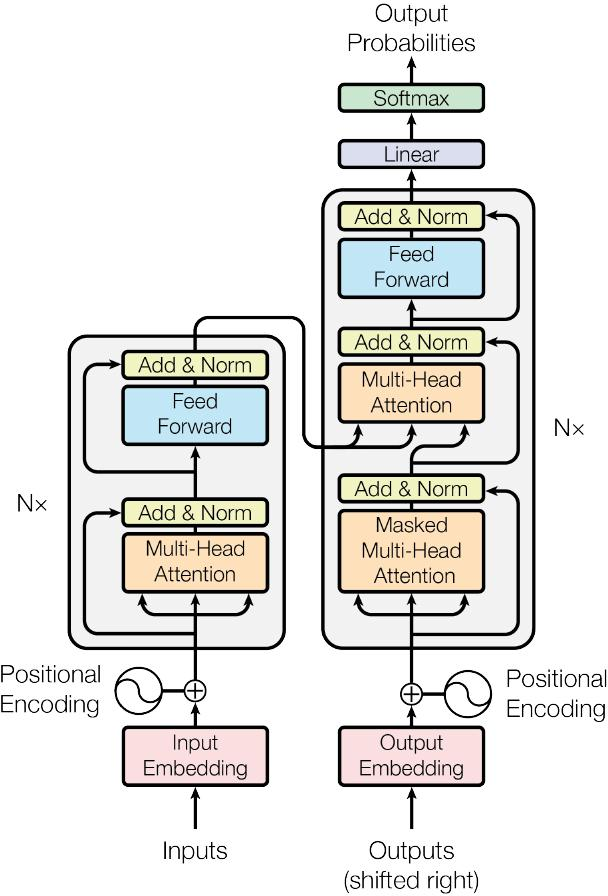

In [19]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

## Summarize the data

Create a summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process.

### Text and Table summaries

We don't need a multimodal model to generate the summaries of the tables and the text. I will use open source models available on Groq.

In [20]:
%pip install -Uq langchain-groq

In [21]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [22]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [23]:
print(texts[0])

3 2 0 2

g u A 2 ] L C . s c [

7 v 2 6 7 3 0 . 6 0 7 1 : v i X r a

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.

Attention Is All You Need

Ashish Vaswani∗ Google Brain avaswani@google.com

Noam Shazeer∗ Google Brain noam@google.com

Niki Parmar∗ Google Research nikip@google.com

Jakob Uszkoreit∗ Google Research usz@google.com

Llion Jones∗ Google Research llion@google.com

Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu

Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com

Illia Polosukhin∗ ‡ illia.polosukhin@gmail.com

Abstract

The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on

In [24]:
tables[0].to_dict()

{'type': 'Table',
 'element_id': 'd8f29850c66ef0cf83d6618456cc82bf',
 'text': 'Layer Type Self-Attention Recurrent Convolutional Self-Attention (restricted) Complexity per Layer O(n2 · d) O(n · d2) O(k · n · d2) O(r · n · d) Sequential Maximum Path Length Operations O(1) O(n) O(1) O(1) O(1) O(n) O(logk(n)) O(n/r)',
 'metadata': {'last_modified': '2025-01-11T02:25:08',
  'text_as_html': '<table><tr><td>Layer Type</td><td>Complexity per Layer</td><td>Sequential Operations</td><td>Maximum Path Length</td></tr><tr><td>Self-Attention</td><td>O(n? - d)</td><td>O(1)</td><td>O(1)</td></tr><tr><td>Recurrent</td><td>O(n - d?)</td><td>O(n)</td><td>O(n)</td></tr><tr><td>Convolutional</td><td>O(k-n-d?)</td><td>O(1)</td><td>O(logx(n))</td></tr><tr><td>Self-Attention (restricted)</td><td>O(r-n-d)</td><td>ol)</td><td>O(n/r)</td></tr></table>',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 6,
  'orig_elements': 'eJxtU9tuozAQ/RXLT40UAjZNc1HUatXXVo22ectGyOBJsGIwC8NuUNV/X5vcIJs

In [25]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [26]:
text_summaries

['The paper "Attention Is All You Need" proposes a new simple network architecture, the Transformer, based solely on attention mechanisms, without recurrence and convolutions. It achieves state-of-the-art results in machine translation tasks, improving over existing best results by 2-4 BLEU points, and generalizes well to other tasks.',
 'Recurrent neural networks, particularly long short-term memory and gated recurrent networks, have been established as state-of-the-art approaches in sequence modeling and transduction problems. However, they have a fundamental constraint of sequential computation, limiting parallelization and memory constraints. Attention mechanisms have improved sequence modeling but are often used in conjunction with recurrent networks. This work proposes the Transformer, a model architecture that eschews recurrence and relies entirely on an attention mechanism for global dependencies, allowing for significant parallelization and reaching a new state of the art in t

In [27]:
table_summaries

['The table compares four types of neural network layers: Self-Attention, Recurrent, Convolutional, and Self-Attention (restricted). The complexity per layer and sequential operations vary among the layers, with Self-Attention having O(1) sequential operations, while Recurrent and Convolutional have O(n) and Self-Attention (restricted) has O(log) sequential operations. Maximum path length also differs, with Self-Attention and Convolutional having O(1) and O(logx(n)) respectively, while Recurrent has O(n) and Self-Attention (restricted) has O(n/r).',
 'The table compares various machine translation models, including ByteNet, Deep-Att + PosUnk, GNMT + RL, ConvS2S, MoE, and Transformer, based on their performance on English-to-German and English-to-French translation tasks, with metrics including BLEU scores and training and inference costs.',
 'The table appears to be a comparison of various deep learning models with different parameters, including input size, number of layers, and embed

### Image summaries

We will use gpt-4o-mini to produce the image summaries.

In [28]:
%pip install -Uq langchain_openai

In [29]:
#using OpenAI which is paid.

# from langchain_openai import ChatOpenAI

# prompt_template = """Describe the image in detail. For context,
#                   the image is part of a research paper explaining the transformers
#                   architecture. Be specific about graphs, such as bar plots."""
# messages = [
#     (
#         "user",
#         [
#             {"type": "text", "text": prompt_template},
#             {
#                 "type": "image_url",
#                 "image_url": {"url": "data:image/jpeg;base64,{image}"},
#             },
#         ],
#     )
# ]

# prompt = ChatPromptTemplate.from_messages(messages)

# chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


# image_summaries = chain.batch(images)

In [30]:
#alternative to OpenAI

from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import io
import base64

# Initialize the BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Convert base64 image string to image
def base64_to_image(base64_str):
    img_data = base64.b64decode(base64_str)
    image = Image.open(io.BytesIO(img_data))
    return image


# Convert base64 to image
images_org = [base64_to_image(img_str) for img_str in images]

# Prepare the input for the model
inputs = processor(images=images_org, return_tensors="pt")

# Generate a description for the image
out = model.generate(**inputs, max_length=100, num_beams=5, no_repeat_ngram_size=2)

# Decode the generated descriptions
image_summaries = [processor.decode(output, skip_special_tokens=True) for output in out]



preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [31]:
image_summaries

['a block diagram showing the different types of the block',
 'a diagram showing the different types of the same product',
 'a diagram showing the different types of a product',
 'a diagram showing the different types of the algorithm',
 'a diagram showing the number of different parts in each of the components',
 'an image of a graph with a line graph in the middle of the graph',
 'a plot showing the number of lines that have been drawn in different directions',
 'a red line shows the number of lines that have been drawn in different directions']

In [32]:
print(image_summaries[1])

a diagram showing the different types of the same product


In [33]:
len(image_summaries), len(images)

(8, 8)

In [34]:
images[7]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAIDBAMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyXX/EEngr4sXupQ6Fq2p22o2MSXX2W1LeW6Z2lG6MCOCvGDzm

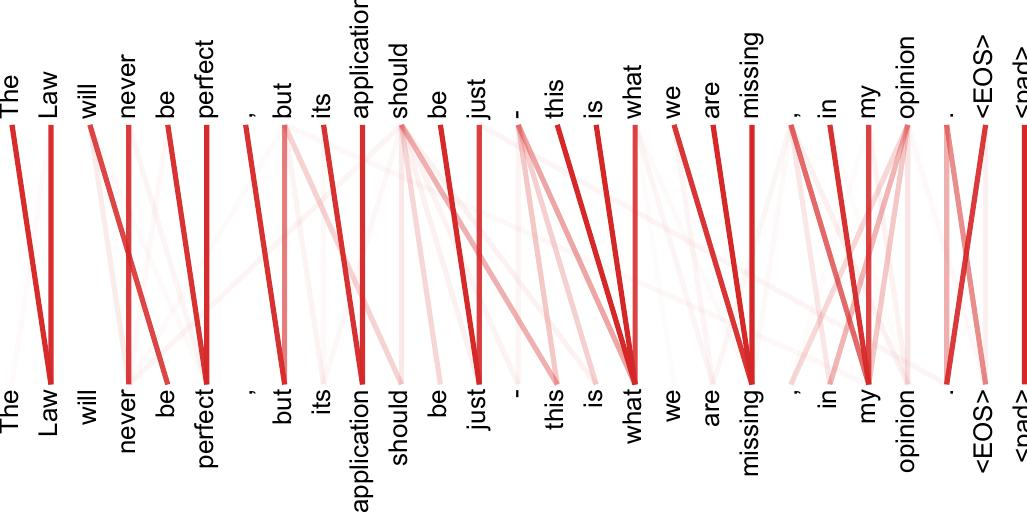

In [35]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[7])

## Load data and summaries to vectorstore

### Create the vectorstore

In [36]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
# from langchain.embeddings import OpenAIEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
# vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = Chroma(collection_name="multi_modal_rag1", embedding_function=embedding_model,persist_directory="./chroma_storage")

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

<ipython-input-36-fbc11802e459>:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-36-fbc11802e459>:12: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag1", embedding_function=embedding_model,persist_directory="./chroma_storage")


### Load the summaries and link the to the original data

In [37]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

### Check retrieval

In [38]:
# Retrieve
docs = retriever.invoke(
    "What is multi head attention?"
)

In [39]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

3.2.2 Multi-Head Attention

Instead of performing a single attention function with dmodel-dimensional keys, values and queries, we found it beneficial to linearly project the queries, keys and values h times with different, learned linear projections to dk, dk and dv dimensions, respectively. On each of these projected versions of queries, keys and values we then perform the attention function in parallel, yielding dv-dimensional

4To illustrate why the dot products get large, assume that the components of q and k are independent random i=1 qiki, has mean 0 and variance dk.

4

output values. These are concatenated and once again projected, resulting in the final values, as depicted in Figure 2.

Multi-head attention allows the model to jointly attend to information from different representation subspaces at different positions. With a single attention head, averaging inhibits this.

MultiHead(Q, K, V ) = Concat(head1, ..., headh)W O where headi = Attention(QW Q i , KW K i , V W V i )


## RAG pipeline

In [ ]:
#using OpenAI which is paid.


# from langchain_core.runnables import RunnablePassthrough, RunnableLambda
# from langchain_core.messages import SystemMessage, HumanMessage
# from langchain_openai import ChatOpenAI
# from base64 import b64decode


# def parse_docs(docs):
#     """Split base64-encoded images and texts"""
#     b64 = []
#     text = []
#     for doc in docs:
#         try:
#             b64decode(doc)
#             b64.append(doc)
#         except Exception as e:
#             text.append(doc)
#     return {"images": b64, "texts": text}


# def build_prompt(kwargs):

#     docs_by_type = kwargs["context"]
#     user_question = kwargs["question"]

#     context_text = ""
#     if len(docs_by_type["texts"]) > 0:
#         for text_element in docs_by_type["texts"]:
#             context_text += text_element.text

#     # construct prompt with context (including images)
#     prompt_template = f"""
#     Answer the question based only on the following context, which can include text, tables, and the below image.
#     Context: {context_text}
#     Question: {user_question}
#     """

#     prompt_content = [{"type": "text", "text": prompt_template}]

#     if len(docs_by_type["images"]) > 0:
#         for image in docs_by_type["images"]:
#             prompt_content.append(
#                 {
#                     "type": "image_url",
#                     "image_url": {"url": f"data:image/jpeg;base64,{image}"},
#                 }
#             )

#     return ChatPromptTemplate.from_messages(
#         [
#             HumanMessage(content=prompt_content),
#         ]
#     )


# chain = (
#     {
#         "context": retriever | RunnableLambda(parse_docs),
#         "question": RunnablePassthrough(),
#     }
#     | RunnableLambda(build_prompt)
#     | ChatOpenAI(model="gpt-4o-mini")
#     | StrOutputParser()
# )

# chain_with_sources = {
#     "context": retriever | RunnableLambda(parse_docs),
#     "question": RunnablePassthrough(),
# } | RunnablePassthrough().assign(
#     response=(
#         RunnableLambda(build_prompt)
#         | ChatOpenAI(model="gpt-4o-mini")
#         | StrOutputParser()
#     )
# )

Device set to use cuda:0


docs [<unstructured.documents.elements.Table object at 0x7ccdb23e8f70>, '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAOAAmADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKK

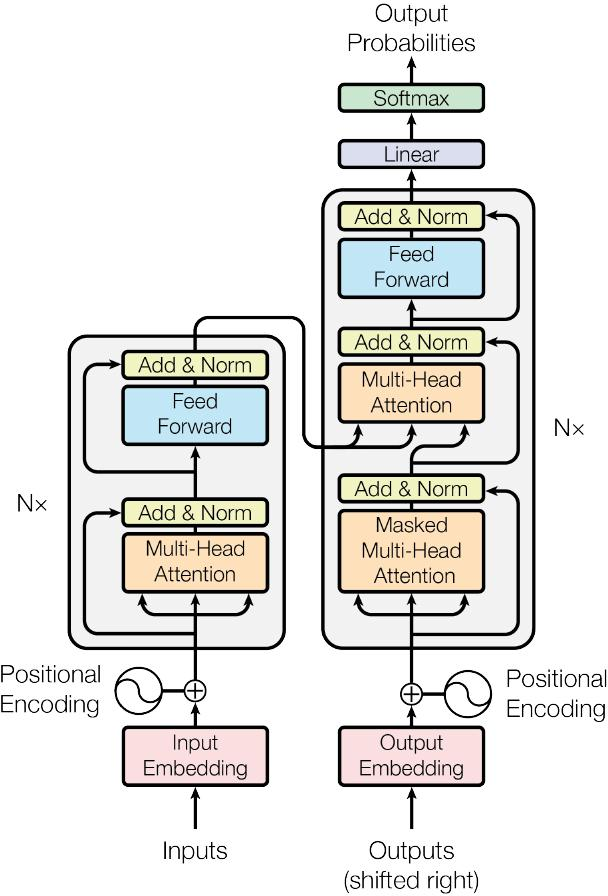

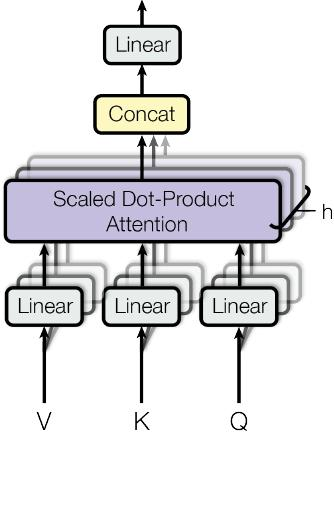

In [73]:
#alternative to OpenAI with no image and table processing .
from langchain_core.runnables import RunnablePassthrough, RunnableLambda, Runnable
from langchain_core.messages import HumanMessage
from langchain.prompts import ChatPromptTemplate
from transformers import pipeline
from base64 import b64decode
import base64
from IPython.display import Image, display
import re
import pytesseract
from io import BytesIO
import PIL

def truncate_to_last_sentence(response):
    """
    Truncates the text after the last found '.', '!', or '?'.
    """
    # Find the position of the last sentence-ending punctuation
    match = re.search(r'([.!?])(?=[^.!?]*$)', response)
    if match:
        # Truncate the response up to the last sentence-ending punctuation
        return response[:match.end()]
    return response  # If no punctuation found, return the original response
# Function to display base64 images
def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))



# Free model pipeline (e.g., HuggingFace)
qa_model = pipeline("text2text-generation", model="google/flan-t5-small",
    max_length=512,  # Adjust as needed
    num_beams=4)

# Function to parse documents
def parse_docs(docs):
    """Split base64-encoded images and texts"""
    print("docs",docs)
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    print("Image",b64)
    print("text",text)
    return {"images": b64, "texts": text}

# Function to truncate documents
def truncate_docs(docs, max_docs=5):
    """Truncates the number of documents to max_docs"""
    if isinstance(docs, list):
        return docs[:max_docs]

    return docs

# Function to build the prompt
def build_prompt(kwargs, max_context_length =2024):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]
    print("docs_by_type",docs_by_type)
    print("user_question",user_question)
    context_text = ""
    if len(docs_by_type["texts"]) > 0:

        for text_element in docs_by_type["texts"]:
            if "Table" in str(type(text_element)):
                # text_as_html = text_element.metadata.text_as_html
                # context_text += text_as_html
                pass
            else:
            # Assuming text_element has 'text' property
              context_text += text_element.text + " "
    # if len(docs_by_type["images"]) > 0:
    #     for image in docs_by_type["images"]:
    #Truncate the context
    context_text = context_text[:max_context_length]
    prompt_template = f"""
    You are an expert in analyzing technical documents, including diagrams.

    Answer the question based on the provided text, table and image, if available.
    Context: {context_text}

    Question: {user_question}
    """
    return prompt_template

# Custom Runnable for Free LLM
class FreeLLMRunnable(Runnable):
    def __init__(self, model_pipeline):
        self.model_pipeline = model_pipeline

    def invoke(self, prompt, config=None):
        response = self.model_pipeline(prompt)[0]["generated_text"]
        final_response = truncate_to_last_sentence(response)
        return final_response

# Instantiate the runnable
free_model_runnable = FreeLLMRunnable(qa_model)

# Build the chain
chain = (
    {
        "context": retriever | RunnableLambda(truncate_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(lambda x: {"context": parse_docs(x['context']), "question": x['question']})
    | RunnablePassthrough.assign(
        response = lambda x: RunnableLambda(lambda y: build_prompt(y)) | free_model_runnable,
        context = lambda x: x['context']
    )
)

# Example Usage
response = chain.invoke(
    "Say about the Layer Type"
)
# "What is multi head attention?"

print("Response:", response['response'])
print("\n" + "-"*80 + "\n")
print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*80 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

## References

- [LangChain Inspiration](https://github.com/langchain-ai/langchain/blob/master/cookbook/Semi_structured_and_multi_modal_RAG.ipynb?ref=blog.langchain.dev)
- [Multivector Storage](https://python.langchain.com/docs/how_to/multi_vector/)